# fxデータを解析
データを解析し規則性を見出す．

In [208]:
import pandas as pd
import numpy as np
from numpy.linalg import norm
import matplotlib.pyplot as plt
import sys
sys.path.append('../module')
from utils import log_diff, log_diff_inv, load_fx_data

%matplotlib inline

# 1. 準備
## 1.1 データの読み込み
train dataを読みこむ

In [209]:
instrument_list = ['USD_JPY', 'GBP_JPY', 'EUR_JPY']

df_dict = load_fx_data(instrument_list)

df_dict['EUR_JPY']

,Open_ask,High_ask,Low_ask,Close_ask,Volume,Open_bid,High_bid,Low_bid,Close_bid
Time,,,,,,,,,
2014-01-01 22:00:00+00:00,144.926,145.163,142.859,143.366,143014,144.776,145.108,142.838,143.228
2014-01-02 22:00:00+00:00,143.387,143.387,141.975,142.527,113868,143.237,143.306,141.951,142.412
2014-01-05 22:00:00+00:00,142.515,142.793,141.512,142.080,125100,142.464,142.775,141.491,142.007
2014-01-06 22:00:00+00:00,142.080,142.600,141.951,142.449,115303,142.006,142.584,141.930,142.377
2014-01-07 22:00:00+00:00,142.449,143.184,142.130,142.405,128572,142.380,143.161,142.109,142.316
...,...,...,...,...,...,...,...,...,...
2018-12-03 22:00:00+00:00,129.037,129.065,127.632,127.951,26900,128.927,129.019,127.613,127.901
2018-12-04 22:00:00+00:00,127.989,128.502,127.801,128.439,16113,127.939,128.483,127.782,128.389
2018-12-05 22:00:00+00:00,128.433,128.468,127.683,128.214,37536,128.383,128.418,127.663,128.164


## 1.2 データの整形
対数差分によるトレンド除去

$ (x_n)_{n=1,2,\cdots} \rightarrow (log(x_{n+1}) - log(x_{n}))_{n=1,2,\cdots} $

In [210]:
df_dict_stable = {}
for instrument in df_dict.keys():
    df_stable = df_dict[instrument].copy()
    for column in df_stable.columns:
        df_stable[column] = log_diff(df_stable[column].values)
    df_dict_stable[instrument] = df_stable
df_dict_stable['USD_JPY']

,Open_ask,High_ask,Low_ask,Close_ask,Volume,Open_bid,High_bid,Low_bid,Close_bid
Time,,,,,,,,,
2014-01-01 22:00:00+00:00,4.656528,4.658246,4.649704,4.652407,11.250690,4.656063,4.658104,4.649589,4.651882
2014-01-02 22:00:00+00:00,-0.004103,-0.005153,-0.004515,0.000296,-0.181851,-0.004152,-0.005364,-0.004525,0.000496
2014-01-05 22:00:00+00:00,0.000067,0.000496,-0.001567,-0.006102,0.201352,0.000153,0.000677,-0.001577,-0.006028
2014-01-06 22:00:00+00:00,-0.005893,-0.002089,0.002537,0.003763,-0.160718,-0.005694,-0.002032,0.002259,0.003573
2014-01-07 22:00:00+00:00,0.003763,0.003717,0.004014,0.002434,0.114756,0.003573,0.003688,0.003030,0.002474
...,...,...,...,...,...,...,...,...,...
2018-12-23 22:00:00+00:00,-0.002519,-0.002425,-0.006003,-0.007089,-0.040278,-0.002665,-0.002425,-0.006022,-0.006742
2018-12-25 22:00:00+00:00,-0.004668,0.001976,-0.001116,0.008077,-0.354961,-0.004410,0.001959,-0.001243,0.008378
2018-12-26 22:00:00+00:00,0.007700,-0.000386,0.002801,-0.003400,0.694809,0.007803,-0.000611,0.002947,-0.003572


# 2. データの解析
- pair plot
- moving average
- fft
- autocorr
- power spectrum
- C-H


In [211]:
usd_close_ask = df_dict['USD_JPY']['Close_ask']
usd_close_ask_diff = df_dict_stable['USD_JPY']['Close_ask'][1:] # 初項は外す
np.random.seed(0)
gauss_noise = np.random.normal(size=len(usd_close_ask), scale=0.005)
timeindex = usd_close_ask.index
gauss_df = pd.DataFrame(gauss_noise, index=timeindex)

# 参考
sin = np.sin(np.arange(1000)*np.pi/100) # 周期2000

## 2.1 定常性の解析
ここでは定常過程とは確率分布が時間依存しない確率過程のことである．平均や自己相関を用いて説明されることもある．

https://www.procrasist.com/entry/12-time-series


通常のプロット

対数差分もプロット

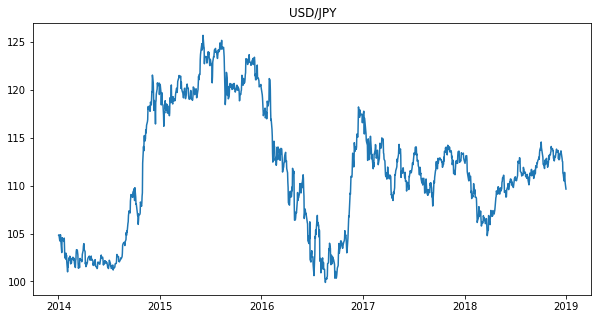

In [212]:
fig = plt.figure(figsize=(10,5))
plt.plot(usd_close_ask)
plt.title('USD/JPY')
fig.savefig('data/img/USD_JPY_Close_ask_plot.png')

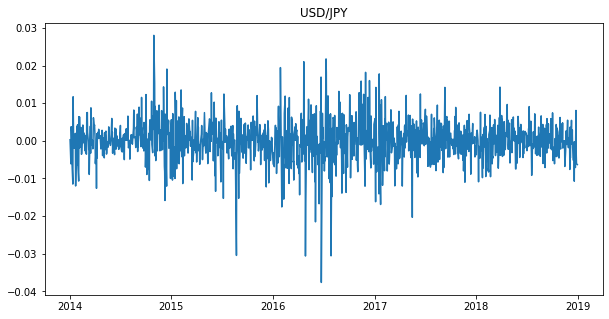

In [213]:
fig = plt.figure(figsize=(10,5))
plt.plot(usd_close_ask_diff)
plt.title('USD/JPY')
fig.savefig('data/img/USD_JPY_Close_ask_logdiff_plot.png')

In [214]:
window = 100

def rolling_analysis(time_series_df, window, title='', plotstd=False, savefig=False):
    rollmean = time_series_df.rolling(window=window).mean()[window:]
    rollstd = time_series_df.rolling(window=window).std()[window:]
    upper = rollmean + rollstd
    lower = rollmean - rollstd
    fig = plt.figure(figsize=(10,5))
    plt.plot(rollmean, label='ma')
    plt.fill_between(rollmean.index, upper, lower, color='lightgray', label='$\pm std$')
    if plotstd:
        plt.plot(rollstd)
    plt.title(f'{title} moving average in {window} days')
    plt.legend()
    if savefig:
        fig.savefig(f'data/img/{title}_ma.png')
    

### 移動平均

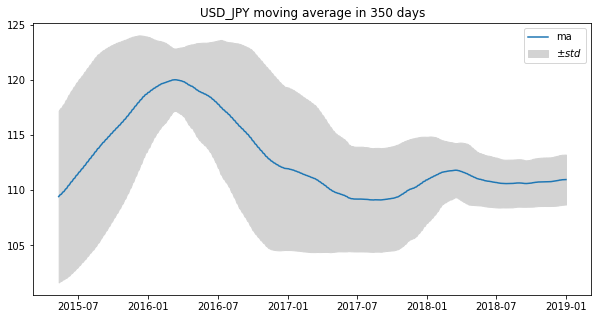

In [215]:
window = 350
rolling_analysis(usd_close_ask, window, title='USD_JPY', savefig=False)

### 差分の移動平均

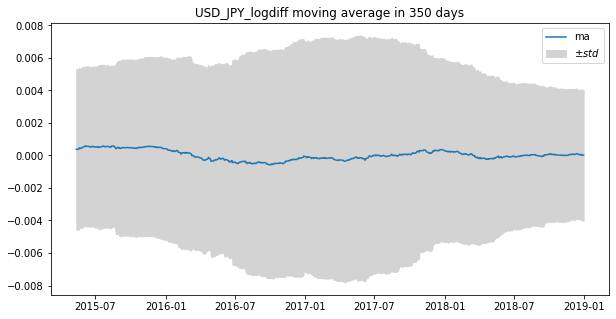

In [216]:
rolling_analysis(usd_close_ask_diff, window, title='USD_JPY_logdiff', savefig=False)

### ADF検定
https://www.statsmodels.org/stable/generated/statsmodels.tsa.stattools.adfuller.html
https://ja.wikipedia.org/wiki/%E6%8B%A1%E5%BC%B5%E3%83%87%E3%82%A3%E3%83%83%E3%82%AD%E3%83%BC%E2%80%93%E3%83%95%E3%83%A9%E3%83%BC%E6%A4%9C%E5%AE%9A

時系列が単位根過程かどうか判定する仮説検定．帰無仮説が単位根過程，対立仮説が定常過程．

検定値(test static)が有意水準の値より小さいときに帰無仮説(単位根である)を棄却する．

#### 詳細
簡単には自己回帰モデルAR(1)
$ x_t = \rho x_{t-1} + u_t $が単位根過程($ \Leftrightarrow \rho = 1$つまり，ランダムウォーク)であることを帰無仮説とする検定を行う．

具体的には
$ \Delta x_t = (1-\rho) x_{t-1} + u_t $
となるので $ \delta = 1 - \rho $

に対して

- 帰無仮説$ H _0 $: $ \delta = 0 $
- 対立仮説$ H_1 $: $ \delta < 0 $

#### 参考

- 単位根過程とは差分が定常となるような非定常過程のこと．
- [ADF検定](https://fisproject.jp/2017/11/statistical-test-on-time-series-data/)
- [単位根](https://ja.wikipedia.org/wiki/%E5%8D%98%E4%BD%8D%E6%A0%B9)

In [217]:
import statsmodels
from statsmodels.tsa.stattools import adfuller

def display_adf_test(time_series, maxlag=0):
    adf, p_val, used_lag, user_observations, critical_values, icbest =  adfuller(time_series, maxlag=maxlag)
    print(f'test statistic: {adf}')
    print(f'p value: {p_val}')
    print(f'used lag: {used_lag}')
    print(f'observations used: {user_observations}')
    print(f'icbest: {icbest}')
    for key, val in critical_values.items():
        print(f'critical value({key}): {val}')

In [218]:
display_adf_test(usd_close_ask, maxlag=0)

test statistic: -1.8712962112751736
p value: 0.34568238536622475
used lag: 0
observations used: 1297
icbest: 2442.7537417589183
critical value(1%): -3.435401880796999
critical value(5%): -2.863770985550096
critical value(10%): -2.567957791647768


In [219]:
display_adf_test(usd_close_ask_diff, maxlag=0)

test statistic: -35.85888965113823
p value: 0.0
used lag: 0
observations used: 1296
icbest: -9732.33110609986
critical value(1%): -3.435405786614854
critical value(5%): -2.86377270896149
critical value(10%): -2.567958709443111


参考のためwhite auss noise

test statistic: -37.09971733528468
p value: 0.0
used lag: 0
observations used: 1297
icbest: -10108.371163834374
critical value(1%): -3.435401880796999
critical value(5%): -2.863770985550096
critical value(10%): -2.567957791647768


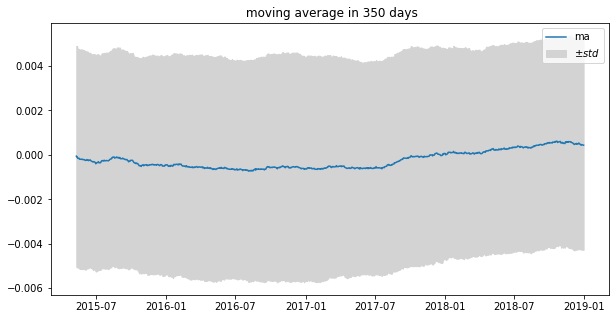

In [220]:
rolling_analysis(gauss_df[0], window) # [0]は実装上の都合
display_adf_test(gauss_df)

## 2.2 pair plot

In [221]:
def plot_randoms(randoms, title='', const=1., plot_hist=True, pair_plot=True, save=False):
    fig = plt.figure(figsize=(10,5))
    if plot_hist:
        ax1 = fig.add_subplot(1,2,1)
        ax1.hist(randoms/const, density=True)
        ax1.set_title(f' hist of {title}')
    if pair_plot:
        ax2 = fig.add_subplot(1,2,2)
        ax2.scatter(randoms[:-1], randoms[1:], alpha=0.1)
        ax2.set_xlabel('$x_i$')
        ax2.set_ylabel('$x_{i+1}$')
        ax2.set_title(f'pair plot of {title}')
        # ax2.set_xlim([-0.02,0.02])
        # ax2.set_ylim([-0.02,0.02])
    if save:
        fig.savefig(f'data/img/{title}_pair_plot.png')

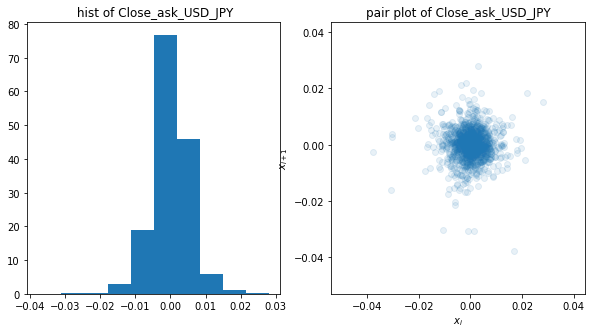

In [222]:
plot_randoms(usd_close_ask_diff, title='Close_ask_USD_JPY', save=False)

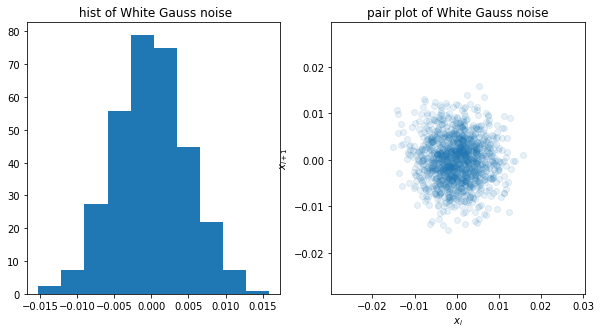

In [223]:
plot_randoms(gauss_noise, title='White Gauss noise', save=False)

In [224]:
# gbp_close_ask_diff = df_dict_stable['GBP_JPY']['Close_ask'][1:] # 初項は外す
# plot_randoms(gbp_close_ask_diff, title='Close_ask_GBP_JPY')
# eur_close_ask_diff = df_dict_stable['EUR_JPY']['Close_ask'][1:] # 初項は外す
# plot_randoms(eur_close_ask_diff, title='Close_ask_EUR_JPY')

参考までにgaussian

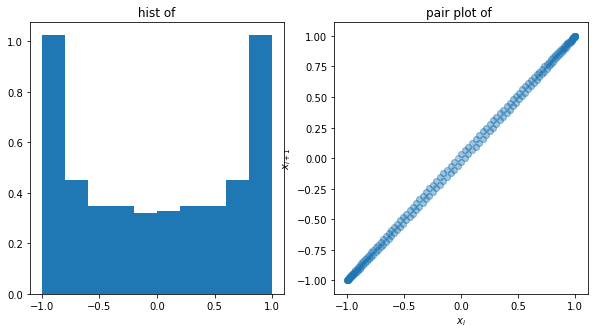

In [225]:
# 参考
plot_randoms(sin)

## 2.3 フーリエ変換

In [226]:
def sort_freq(arr):
    f_range = len(arr)//2
    return np.hstack((arr[-f_range:], arr[:f_range]))

def fft_result_with_freq(arr, n=None):
    N = n or len(arr)
    f_arr = sort_freq(np.fft.fftfreq(N))
    fft_result = sort_freq(np.fft.fft(arr, n=N, norm=None))
    return f_arr, fft_result
    
def fft_analize(arr, title='', n=None, save=False):
    N = n or len(arr)
    print(N)
    f_arr, fft_result = fft_result_with_freq(arr, n=N)
    
    fig = plt.figure(figsize=(15,5))
    ax1 = fig.add_subplot(1,3,1)
    ax1.plot(f_arr, fft_result.real)
    ax1.set_title(f' amp of fft {title}')
    ax2 = fig.add_subplot(1,3,2)
    ax2.plot(f_arr, fft_result.imag)
    ax2.set_title(f'phase of fft {title}')
    ax3 = fig.add_subplot(1,3,3)
    ax3.plot(f_arr, fft_result.real**2)
    ax3.set_title(f'power of fft {title}')

    if save:
        fig.savefig(f'data/img/{title}_fft.png')

    return f_arr, fft_result

n= 1000

1000


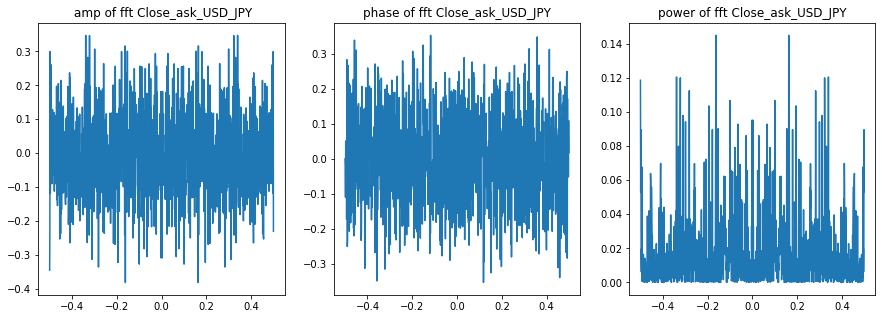

In [227]:
usd_farr, usd_fft = fft_analize(usd_close_ask_diff[1:], n=n, title='Close_ask_USD_JPY', save=False)

In [228]:
# _ = fft_analize(gbp_close_ask_diff[1:], n=n)

In [229]:
# _ = fft_analize(eur_close_ask_diff[1:], n=n)

1000


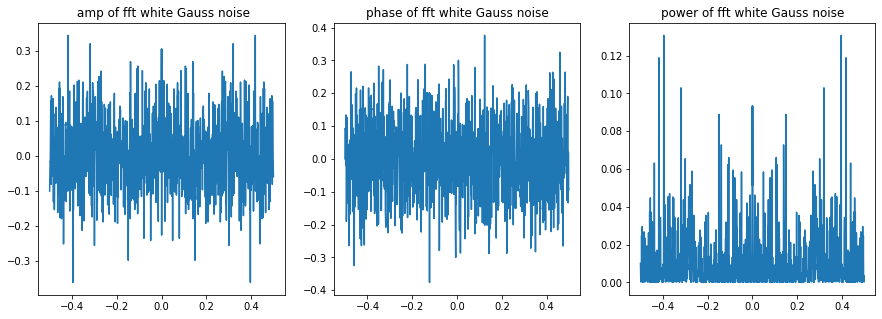

In [230]:
_ = fft_analize(gauss_noise, n=n, title='white Gauss noise', save=False)

1000


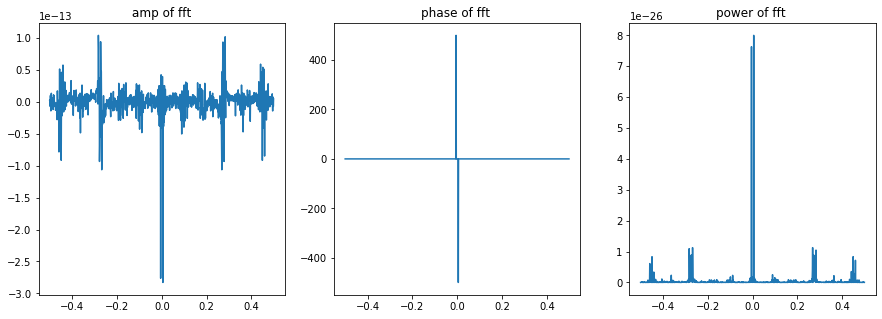

In [231]:
# 参考
_ = fft_analize(sin)

## 2.4 autocorr

In [232]:
def plot_corr(arr, title='', fft=True, save=False):
    N = len(arr)
    if fft:
        corr = np.fft.ifft(np.fft.fft(arr)**2)
    else:
        corr = np.correlate(arr, arr, 'full')[N-1:]
    fig = plt.figure()
    plt.plot(np.arange(N), corr)
    plt.title(f'auto correlation function of {title}')
    if save:
        fig.savefig(f'data/img/{title}_autocorrelation.png')

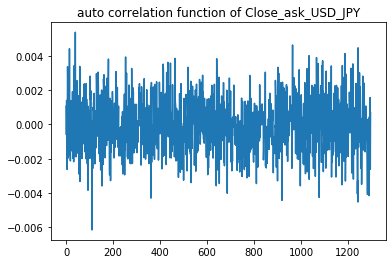

In [233]:
plot_corr(usd_close_ask_diff, title='Close_ask_USD_JPY', save=False)

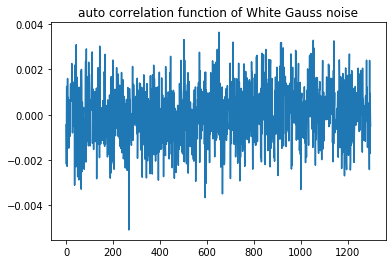

In [234]:
plot_corr(gauss_noise, title='White Gauss noise', save=False)

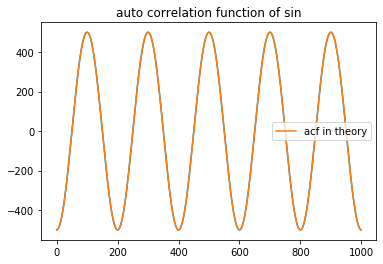

In [244]:
# 参考
plot_corr(sin, title='sin', fft=True)
plt.plot(-500*np.cos(np.arange(1000)*np.pi/100), label='acf in theory')
plt.legend()

## 2.5 リヤプノフ指数
誤差の発達率を指数的に解釈した場合の係数を求める．

時系列$ (x_n) $に対して，以下のように$ \lambda $を求める．

$ \frac{\Delta x_n}{\Delta x_0} = e^{\lambda_n n} \Leftrightarrow \lambda_n = \frac{1}{n} \log(\frac{\Delta x_n}{\Delta x_0}) \rightarrow \lambda $

$ \lambda > 0 $のとき初期値鋭敏性があると判断できる．

### 計算

時系列$ (x_n)_n$が$ x_{n+1} = f(x_n) $に従うとき，

$ \frac{1}{n} \log(\frac{\Delta x_n}{\Delta x_0}) =  \frac{1}{n} \sum_{k=0}^{n-1} \log(|f'(x_k)|) $と計算できる．

しかし，写像$ f $が未知でデータ$ x_0, x_1, \cdots, $のみが与えられている場合にリヤプノフ指数を求めるのは難しい．

In [313]:
# TODO: 未完成
# def log_error_development(data, i, j, term):
#     """
#     args: 
#         - data: np.ndarray 時系列データ
#     return:
#         - log_error_development: np.ndarray, 誤差発達率の対数値の時間発展
#     """
#     e = 1e-16
#     delta0 = np.abs(data[i] - data[j] + e)
#     log_error_development = [np.log(np.abs(data[i+k]-data[j+k] + e)/delta0) for k in range(term)]
#     return np.array(log_error_development)

def tri_diff(x_0,x_1,x_2):
    return (x_2-x_1)/(x_1-x_0)

def compute_lyapnov(time_series, term, dt=0.02, eps=1e-3, verbose=False):
    """
    時系列データからリヤプノフ指数を計算する．
    args:
        - time_series: np.ndarray, 時系列データの配列
        - term: int, 時間発展の期間
        - dt: float, 時間ステップ
        - eps: float, リヤプノフ指数を計算する際の摂動
    require: space_size + term <= len(time_series)
    return:
        - lyapnov: リヤプノフ指数
    """
    # lyapnov_sample = np.zeros((space_size-1, term))
    # for i in range(space_size-1):
    #     l_list = [np.log(np.abs(time_series[i+n+1]-time_series[i+n])) for n in range(term)]
    #     lyapnov_sample[i] = np.array(l_list).cumsum()/term
    # lyapnov = lyapnov_sample.mean(axis=0)
    # return lyapnov

    lyapnov = []
    sample_size = int(len(time_series)/term) -1
    for i in range(sample_size):
        diff = [tri_diff(*time_series[j:j+3]) for j in range(term*i, term*(i+1))]
        l = np.log(np.abs(diff)).sum()
        # diff = (time_series[i+1+term] - time_series[i+term])/(time_series[i+1]-time_series[i])
        # l = np.log(np.abs(diff))
        lyapnov.append(l)
    return np.array(lyapnov)

条件:(議論の余地あり)
- サンプル数: 200
- 時間発展: 500

In [314]:
%%time
# space_size = 200
term = 500
lyapnov_usd_diff = compute_lyapnov(usd_close_ask_diff, term)

CPU times: user 71.1 ms, sys: 1.33 ms, total: 72.4 ms
Wall time: 71.3 ms


In [315]:
# fig = plt.figure()
# plt.plot(lyapnov_usd_diff)
# plt.xlabel('n')
# plt.ylabel('$ \lambda_n $')
# plt.title('Lyapnov exponent of USD/JPY logdiff')
# fig.savefig('data/img/USD_JPY_Close_ask_diff_lyapnov.png')

In [1]:
# 参考: tent写像
a = 1.9999
tent = lambda x: a*min(x, 1-x)
N = 100000
tent_series = np.ones(N)*0.7
x = 0.9
for i in range(N):
    x = tent(x)
    tent_series[i] = x
lyapnov_tent = compute_lyapnov(tent_series, 10000, dt=0.1, verbose=True)
plt.plot(lyapnov_tent)
print(f'lyapnov: {lyapnov_tent.mean()}')
print(f'theory: {np.log(a)}')

NameError: name 'np' is not defined

0.6930971793099037